# Comparisons: Slope

Average hourly wages on Guam have mostly gone up across every sector, including the island-wide minimum wage. However different sectors have changed at different rates.

## Data

The [Guam Statistical Yearbook](https://bsp.guam.gov/guam-statistical-yearbook-2/) table 16-07 contains average hourly wage data from 2016 to 2020 split across several sectors. I manually moved that data into a CSV file located in this folder. Additionally I added a column for the Guam minimum wage for comparison.

In [144]:
import pandas as pd
from pprint import pprint

df = pd.read_csv('average_hourly_earnings.csv', index_col='Year')
print(df)
df.index = df.index.astype(int)

start_year = 2016
end_year = 2020
mid_year = 2018
df = df.loc[[start_year, end_year]]
categories = df.columns.to_list()

      Agriculture  Construction  Manufacturing  Transportation  \
Year                                                             
2020        12.54         17.76          16.28           21.98   
2019        11.28         17.25          16.38           19.12   
2018        10.65         16.80          15.39           18.74   
2017        12.75         15.96          15.94           18.32   
2016        11.31         15.28          14.80           16.70   

      Wholesale trade  Retail trade  Finance, Insurance, Real Estate  \
Year                                                                   
2020            12.92         11.98                            14.83   
2019            12.32         12.47                            14.82   
2018            12.25         11.90                            14.63   
2017            12.00         12.01                            15.53   
2016            10.92         12.49                            13.38   

      Services  Minimum Wage  
Y

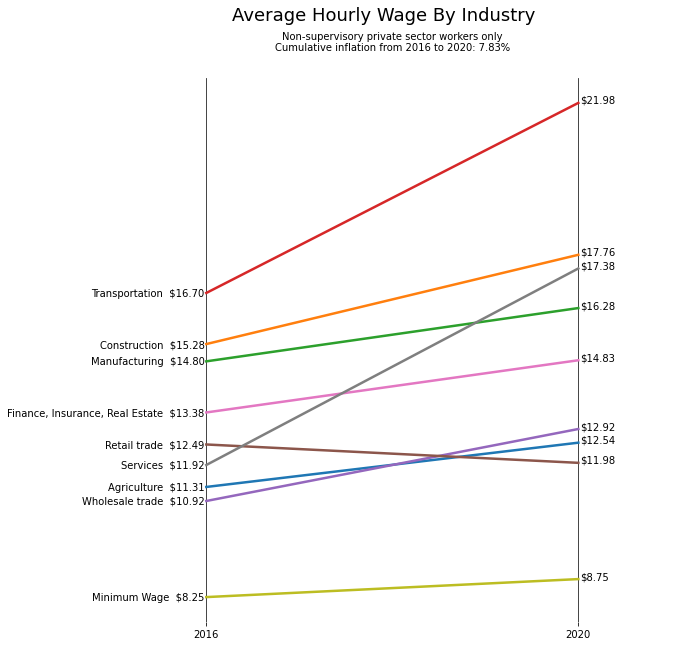

In [148]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10,10))

for c in categories:
    data = df[c]
    plt.plot(data, lw=2.5)
    
    plt.text(start_year-0.02, 
             data[start_year], 
             f'{c}  ${data[start_year]:.2f}', 
             va='center', ha='right')
    
    plt.text(end_year+0.02, 
             data[end_year], 
             f'${data[end_year]:.2f}')

plt.xlim(start_year-1,end_year+1)
plt.xticks([start_year, end_year])
plt.yticks([])

# grid
ax.xaxis.grid(color='black', linestyle='solid', 
              which='both', alpha=0.9)
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.suptitle('Average Hourly Wage By Industry', fontsize=18)
plt.title(('Non-supervisory private sector workers only\n'
           'Cumulative inflation from 2016 to 2020: 7.83%'),
          y=1.04,
          fontsize=10)
plt.show()

In [149]:
fig.savefig('average_hourly_earnings', transparent=True)